In [1]:
import numpy as np
import pandas as pd

import pymc3 as pm

import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define dimension.
d = 1

# Number of samples. 
n = 250

x = np.linspace(start=0, stop=1, num=n)

# Error standar deviation. 
sigma_n = 0.4

# Errors.
epsilon = np.random.normal(loc=0, scale=sigma_n, size=n)

f = np.sin((2*np.pi)*x) + np.sin((4*np.pi)*x)

# Observer target variable. 
y = f + epsilon

/Users/juanitorduz/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


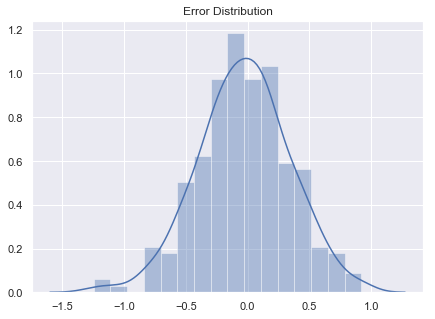

In [3]:
fig, ax = plt.subplots(figsize=(7,5))
# Plot errors. 
sns.distplot(epsilon)

ax.set_title("Error Distribution");

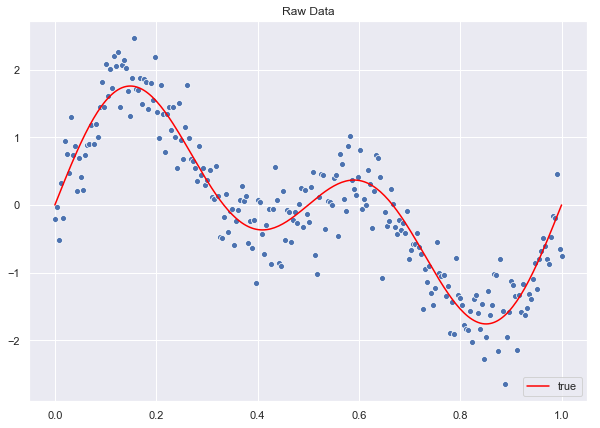

In [4]:
fig, ax = plt.subplots(figsize=(10, 7))
# Plot raw data.
sns.scatterplot(x=x, y=y);
# Plot "true" linear fit.
sns.lineplot(x=x, y=f, color="red", label = "true");

ax.legend(loc="lower right")
ax.set_title("Raw Data");

In [5]:
n_star = 50

x_star = np.linspace(start=0, stop=1, num=n_star)

In [6]:
def kernel_function(x, y, sigma_f=1, l=1):
    
    c = sigma_f * np.exp(- (np.linalg.norm(x - y)**2) / (2 * l**2))
    
    return c

In [7]:
l = 0.1
sigma_f = 2

In [8]:
import itertools

K = [kernel_function(i, j, sigma_f=sigma_f, l=l) for (i, j) in itertools.product(x, x)]

K = np.array(K).reshape(n, n) + (sigma_n**2)*np.eye(n)

In [9]:
K.shape

(250, 250)

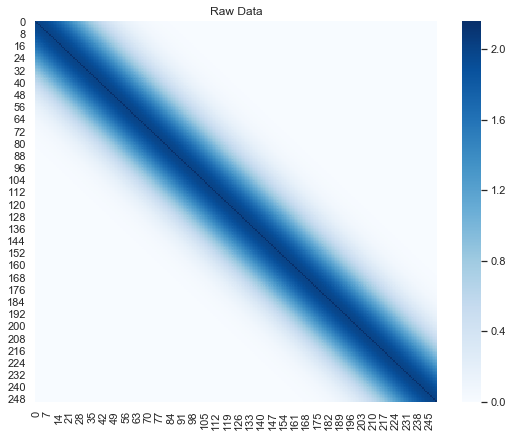

In [10]:
fig, ax = plt.subplots(figsize=(9,7))

sns.heatmap(data=K, cmap="Blues", ax=ax)

ax.set_title("Raw Data");

In [11]:
K_star2 = [kernel_function(i, j, sigma_f=sigma_f, l=l) for (i, j) in itertools.product(x_star, x_star)]

K_star2 = np.array(K_star2).reshape(n_star, n_star)

In [12]:
K_star2.shape

(50, 50)

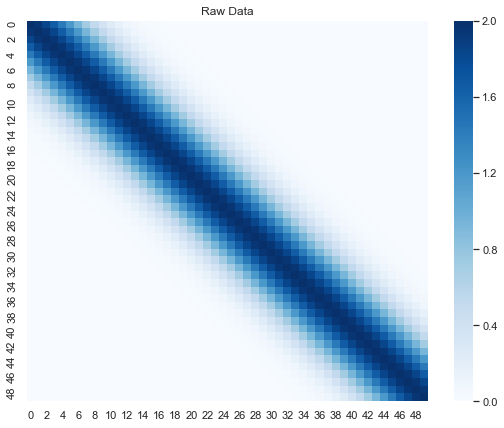

In [13]:
fig, ax = plt.subplots(figsize=(9,7))

sns.heatmap(data=K_star2, cmap="Blues", ax=ax)

ax.set_title("Raw Data");

In [14]:
K_star = [kernel_function(i, j, sigma_f=sigma_f, l=l) for (i, j) in itertools.product(x_star, x)]

K_star = np.array(K_star).reshape(n_star, n)

In [15]:
K_star.shape

(50, 250)

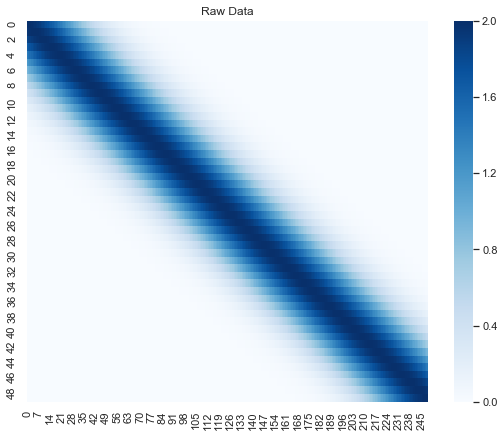

In [16]:
fig, ax = plt.subplots(figsize=(9,7))

sns.heatmap(data=K_star, cmap="Blues", ax=ax)

ax.set_title("Raw Data");

In [17]:
a = np.concatenate((K, K_star), axis=0)
a.shape

(300, 250)

In [18]:
b = np.concatenate((K_star.T, K_star2), axis=0)
b.shape

(300, 50)

In [19]:
C = np.concatenate((a, b), axis=1)
C.shape

(300, 300)

In [20]:
np.all(C.T == C)

True

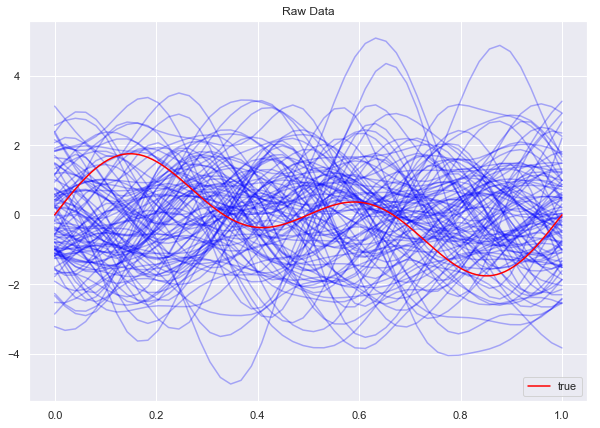

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))
# Plot raw data.

for i in range(0, 100):
    
    z_star = np.random.multivariate_normal(mean=np.zeros(n_star), cov=K_star2)

    sns.lineplot(x=x_star, y=z_star, color="blue", alpha=0.3);
    
# Plot "true" linear fit.
sns.lineplot(x=x.T.reshape(n,), y=f.reshape(n,), color="red", label = "true");

ax.legend(loc="lower right")
ax.set_title("Raw Data");

In [22]:
f_bar_star = np.dot(K_star, np.dot(np.linalg.inv(K), y.reshape([n, d])))

In [23]:
cov_f_star = K_star2 - np.dot(K_star, np.dot(np.linalg.inv(K), K_star.T))

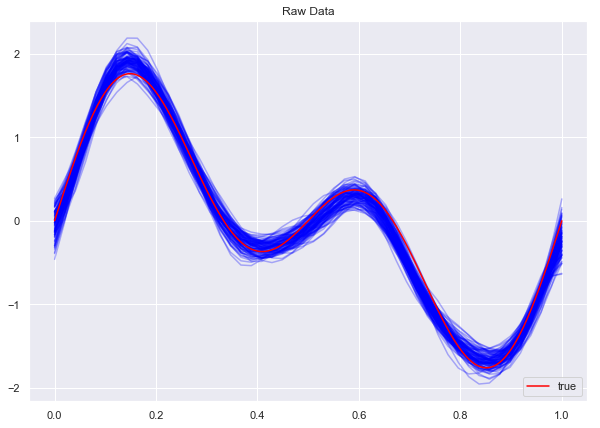

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
# Plot raw data.

for i in range(0, 100):
    
    z_star = np.random.multivariate_normal(mean=f_bar_star.squeeze(), cov=cov_f_star)
    
    sns.lineplot(x=x_star, y=z_star, color="blue", alpha=0.3);

# Plot "true" linear fit.
sns.lineplot(x=x, y=f, color="red", label = "true");

ax.legend(loc="lower right")
ax.set_title("Raw Data");